In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [22]:
df=pd.read_csv('Metazygia monitor 1_DD.csv', index_col=0)
dfall=pd.read_csv('Metazygia monitor 1_DD_Stats.csv', index_col=0)
dfone=pd.read_csv('Metazygia monitor 1_DD-MINUS DAY 1_Stats.csv', index_col=0)
dftwo=pd.read_csv('Metazygia monitor 1_DD-MINUS DAY 1 AND 2_Stats.csv', index_col=0)
column=df.columns[1:]
perone=pd.DataFrame(data= dfone['Period'],index=column)
pertwo=pd.DataFrame(data= dftwo['Period'],index=column)
per=pd.DataFrame(data=dfall['Period'],index=column)
perT = per.T
dft = df.drop(columns = ['lights'])
columns=df.columns[1:]

In [19]:
#Create uniform y-axis limit
def create_ylimit(df):
    #find the standard deviation and mean of each column from the dataset without zeros
    df_limit=df.replace(0, np.nan)
    std=df_limit.std()
    mean=df_limit.mean()
    #Find mean and standard deviation of all of the data
    df_mean=np.mean(mean)
    df_std =np.mean(std)
    #y limit = mean of the dataframe plus 3 standard deviations
    y_limit = df_mean +3*df_std
    return y_limit

def plot_night_test(df):
    #Make a copy of the dataframe and create two columns for the difference between the light values and for the date and time
    dfc = df.copy()
    dfc['diff'] = dfc.lights.diff()
    dfc=dfc.reset_index()
    dfc[["day", "time"]] = dfc["Date_Time"].str.split(" ", expand = True)
    #Separate by the difference to determine when the light is coming on or going off
    df_off = dfc.loc[dfc['diff'] == 1]
    df_on = dfc.loc[dfc['diff'] == -1]
    #Assign variable from the lists
    start1 = dfc.time.values[0]
    end1 = df_off.time.values[0]
    start2 = df_on.time.values[0]
    end2 = dfc.time.values[-1]

    return start1, start2, end1, end2

#Plot activity in subplots
#Imput:Dataframe, List of spiders in df, Specific Spider from list, 
#Label for subplots, variable from "create_ylimit" funnction 
#All variables will be named in final raster plot function
def plot_raster( df, column, spider, ax, y, num_days, min_day): 
    for i in range(0,num_days):
        #Separate dataframe into sections of 1440 minutes(minutes in a day) and plot the 
        #activity for each day
        ax[i].plot(df['time'][min_day*i:min_day*(i+1)], df[column[spider]][min_day*i:min_day*(i+1)], color='blue')
        #Label each day
        ax[i].set_ylabel('Subj. Day '+str(i+1))
        #ax[i].set_ylabel(df.day[min_day*i])
        ax[i].set_xticks([])
        # the y limit is the mean plus 3 standard deviations
        ax[i].set_ylim(0,y)
        #setting instructions for shading the graph when the lights are off
        df1=df[min_day*(i):min_day*(i+1)]
        df1=df1.reset_index()
    
        #Make DD plots all grey
        if np.mean(df1.lights)==0:
            ax[i].set_facecolor("silver")
        #Run function to determine when lights are off during LD cycle
        else:
            start1, start2, end1, end2 = plot_night_test(df1)
            ax[i].axvspan(start1, end1, color='silver')
            ax[i].axvspan(start2, end2, color='silver')
            
#Combine all funtions to make raster plots for all spiders given a data frame and list of spiders
def spider_raster(df, per):
    column=df.columns[1:]
    perT = per.T
    #create a copy and separate the date and time for reference
    df_time = df.copy()
    df_time=df_time.reset_index()
    df_time[["day", "time"]] = df_time["Date_Time"].str.split(" ", expand = True)
    #for loop for creating figures for the number of spiders in the dataframe
    for spider in  range(len(column)):
        #Determine length of usable data for each spider
        dftest=df[column[spider]].dropna()
        print(column[spider])
        min_day = int((perT[column[spider]].values) * 60)
        #sub_mins_day = per.iloc[0]['A']
        #print(min_day)
        total_time = len(df.index)
        num_days = total_time//min_day
        #Plot subplots
        fig, ax=plt.subplots(num_days,1, figsize=(8,12), sharey=True)
        fig.suptitle('The Free Running Period of: ' + column[spider], fontsize=16)        
        #setting the y axis limit
        y = create_ylimit(df) 
        #plotting the raster plots
        plot_raster(df_time, column, spider, ax, y, num_days, min_day)
        #plot x axis
        x=int(min_day/4)
        ax[num_days-1].set_xticks([0,x,2*x,3*x,4*x],['0:00','6:00','12:00','18:00','24:00'])
        plt.xlabel('Subjective Time')
        #save figure
        #fig.savefig(column[spider] +'raster_DD_Period')
        #plt.show()
        print('Next spider')

In [4]:
dftestdayone=df.loc[:,['lights','Monitor 1 Spider 10']]

dftestdaytwo=df.loc[:,['lights','Monitor 1 Spider 3', 'Monitor 1 Spider 5', 'Monitor 1 Spider 7', 'Monitor 1 Spider 13', 'Monitor 1 Spider 15', 'Monitor 1 Spider 16', 'Monitor 1 Spider 27', 'Monitor 1 Spider 28', 'Monitor 1 Spider 30']]


Monitor 1 Spider 10


<ipython-input-3-667900e8d1e3>:86: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  ax[num_days-1].set_xticks([0,x,2*x,3*x,4*x],['0:00','6:00','12:00','18:00','24:00'])


Next spider


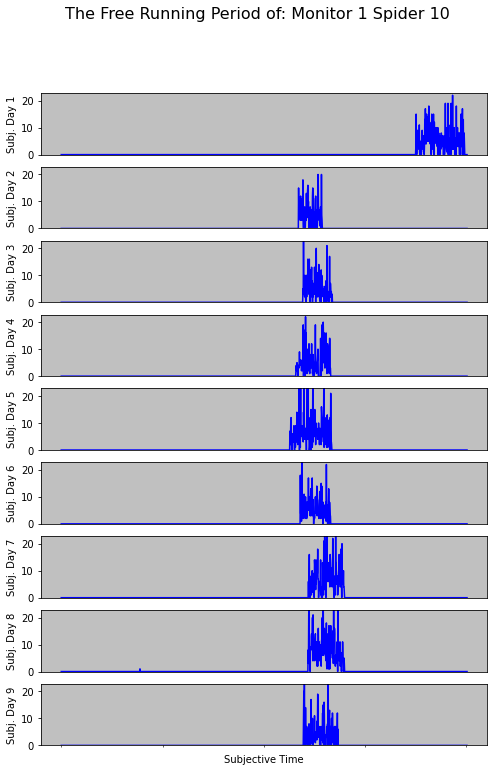

In [5]:
spider_raster(dftestdayone, perone)

Monitor 1 Spider 3
Next spider
Monitor 1 Spider 5
Next spider
Monitor 1 Spider 7
Next spider
Monitor 1 Spider 13
Next spider
Monitor 1 Spider 15
Next spider
Monitor 1 Spider 16
Next spider
Monitor 1 Spider 27
Next spider
Monitor 1 Spider 28
Next spider
Monitor 1 Spider 30
Next spider


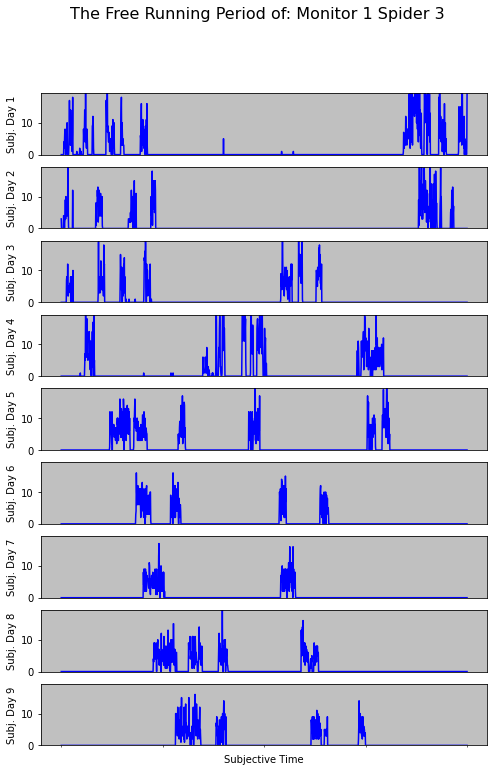

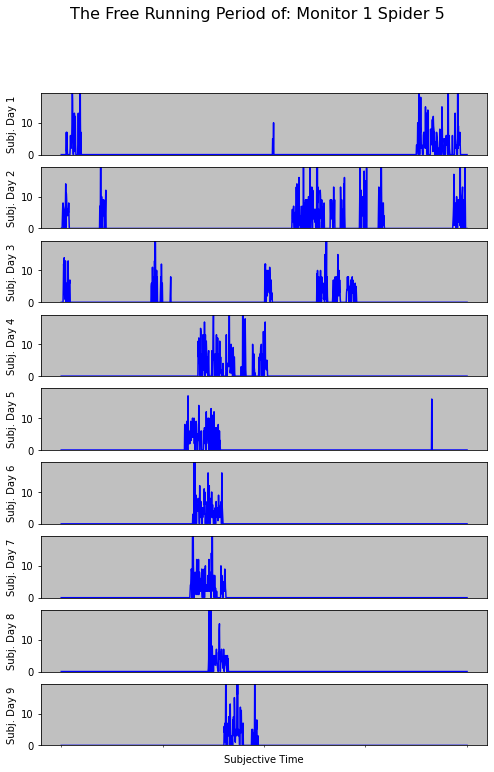

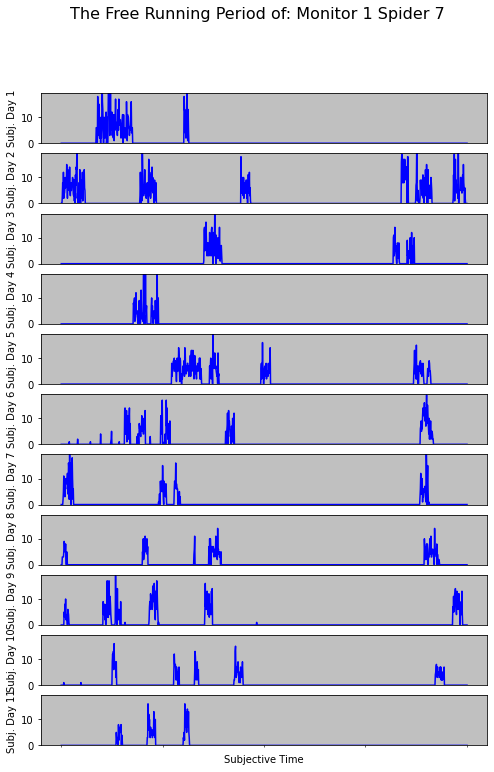

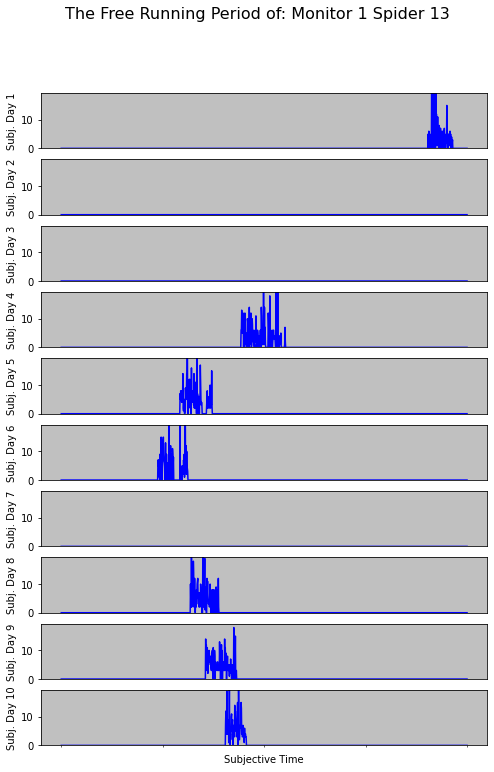

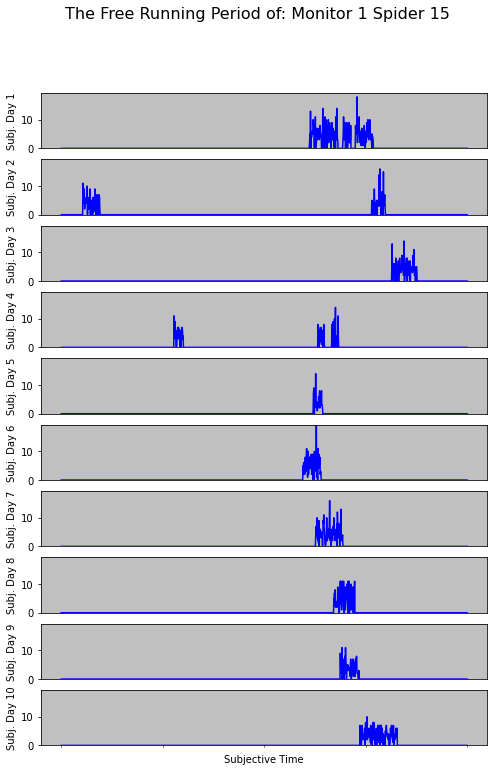

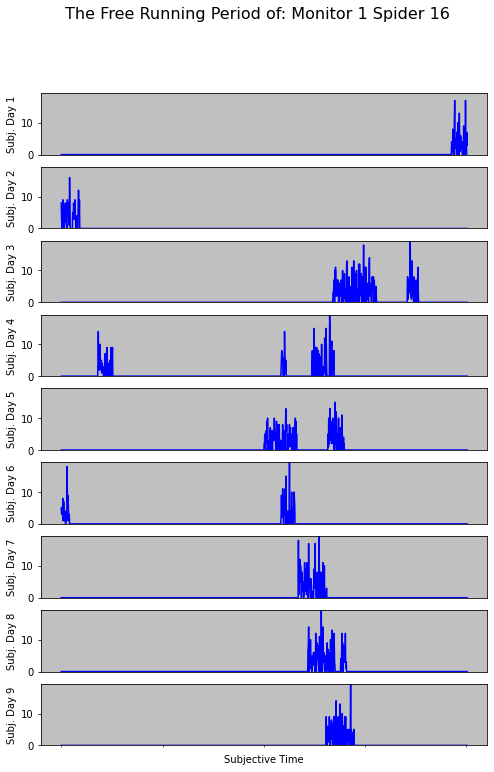

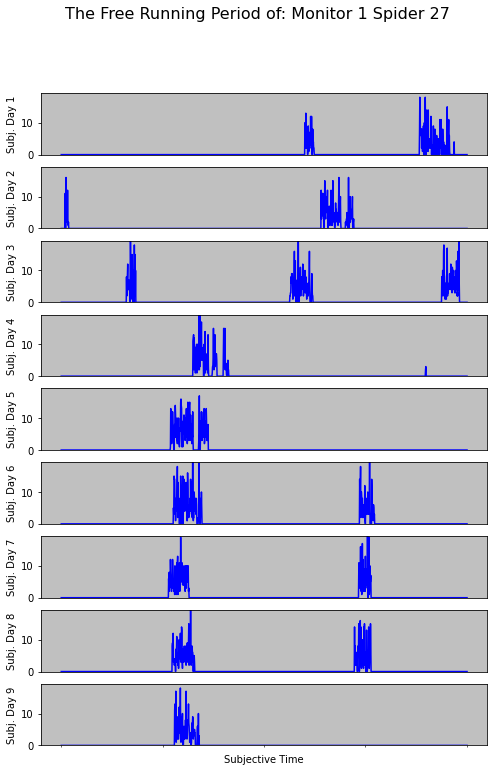

Error in callback <function flush_figures at 0x000001A26BAA7E50> (for post_execute):


KeyboardInterrupt: 

In [9]:
spider_raster(dftestdaytwo, pertwo)

In [25]:
def average_subjective_activity_max_first(dft, subjective_df):
    for spider in range(len(dft.columns)):
        spider_period = subjective_df[columns[spider]].values
        subjective_hour = spider_period / 24
        hour = 0
        sub_hours = []
        for i in range(0, len(dft)):
            sub_hours.append(hour)
            if i % int(subjective_hour * 60) == 0 and i >= 40:
                hour += 1
            if hour == 24:
                hour = 0
        dft["Subjective Hours"] = sub_hours
        avg_mins = dft.groupby('Subjective Hours')[columns[spider]].mean()
        max_avg_hour = avg_mins.argmax()
        reordered_avg_mins = pd.concat([avg_mins[max_avg_hour:], avg_mins[:max_avg_hour]])
        fig = plt.figure(figsize=(8, 6))
        plt.bar(range(0,24), reordered_avg_mins)
        plt.title(columns[spider] + ' Average Activity for Subjective Hours')
        plt.xlabel('Subjective Hours of Free Running Period')
        plt.ylabel('Average minutes of activity per subjective hour')
        tick_labels = list(range(max_avg_hour, 24)) + list(range(0, max_avg_hour))
        plt.xticks(range(len(tick_labels)), tick_labels)
        plt.show()

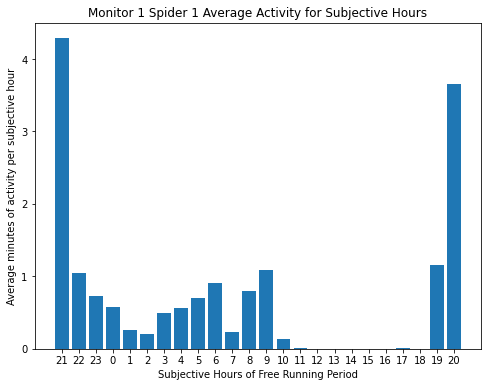

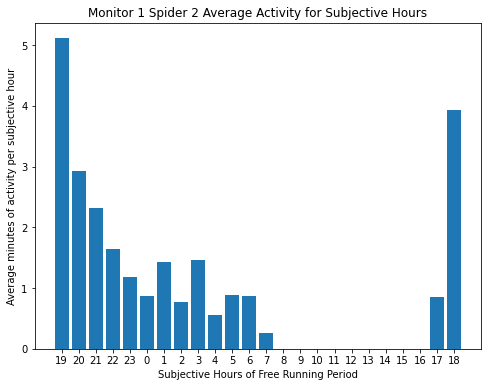

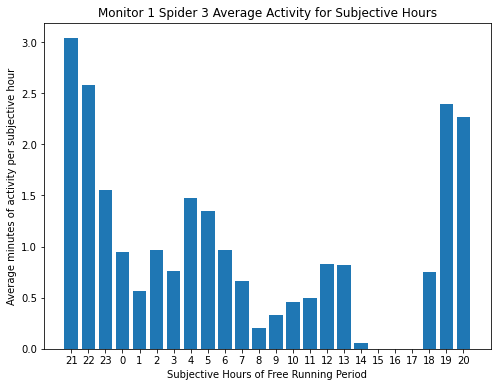

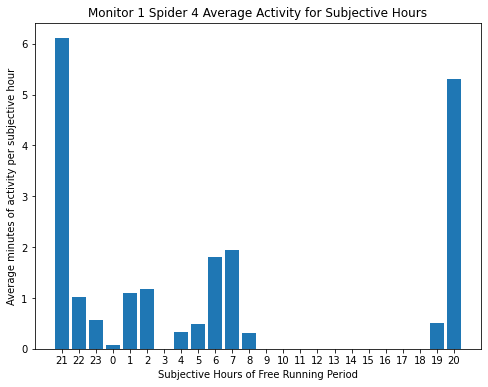

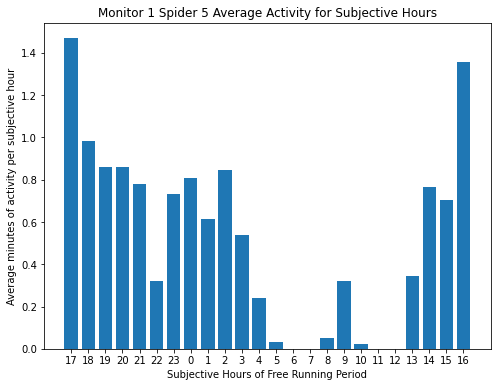

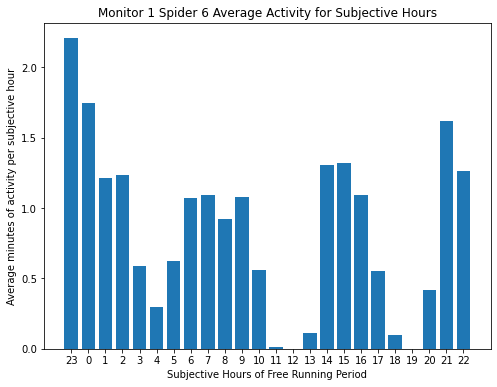

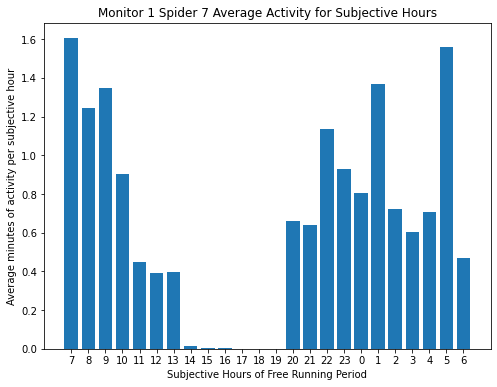

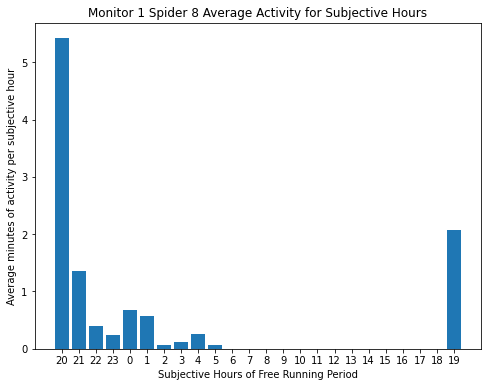

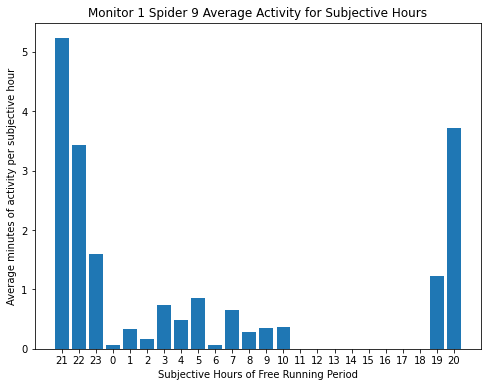

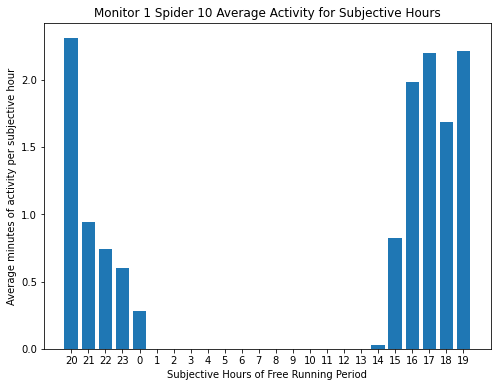

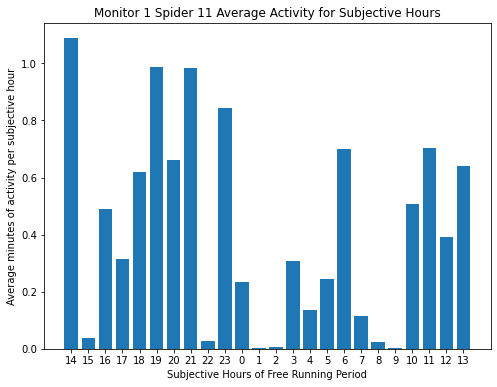

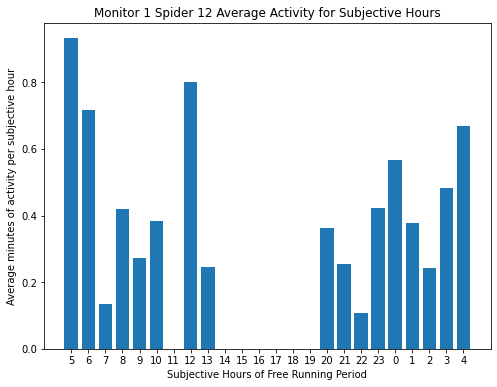

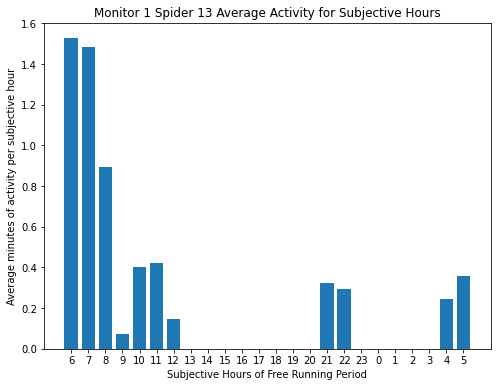

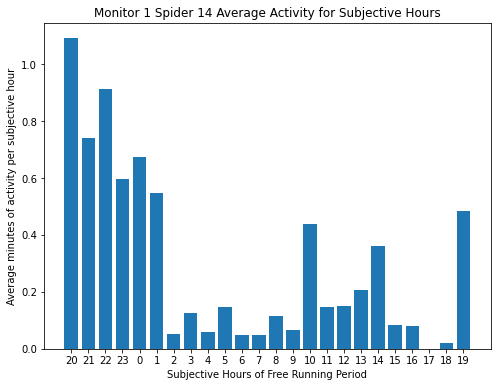

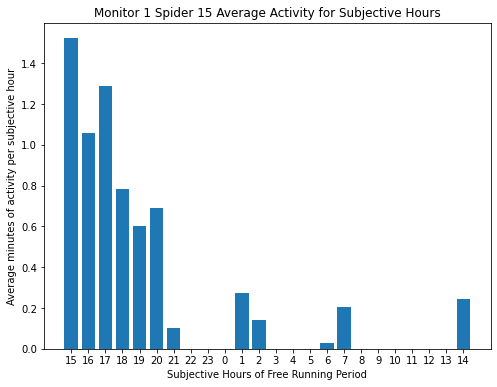

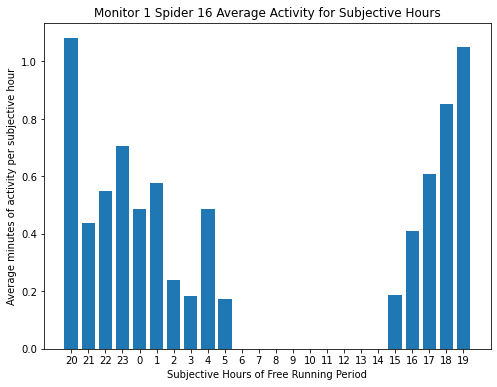

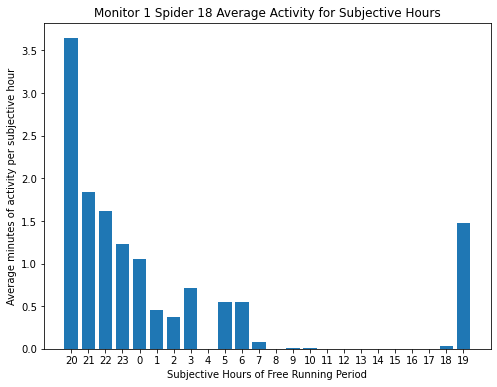

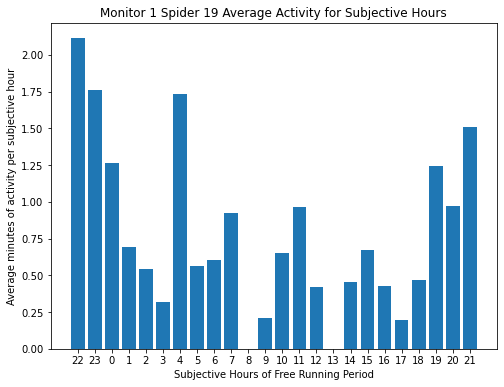

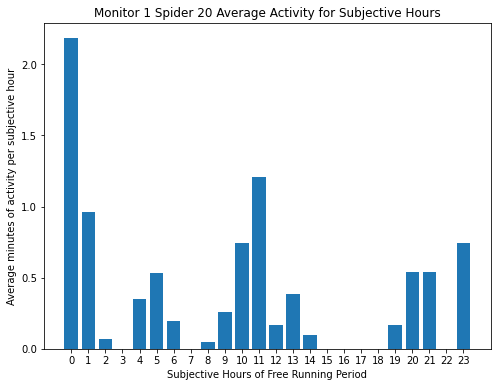

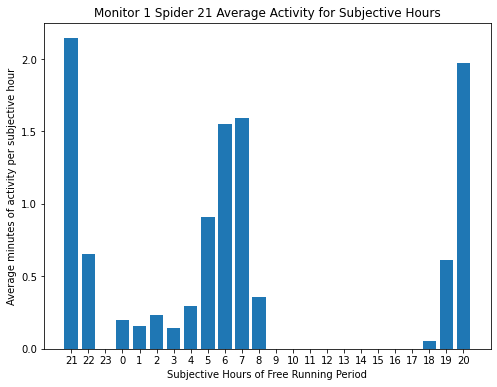

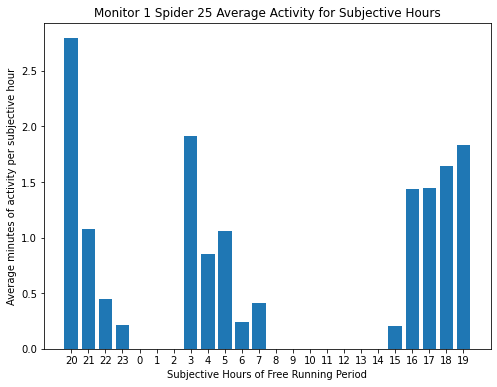

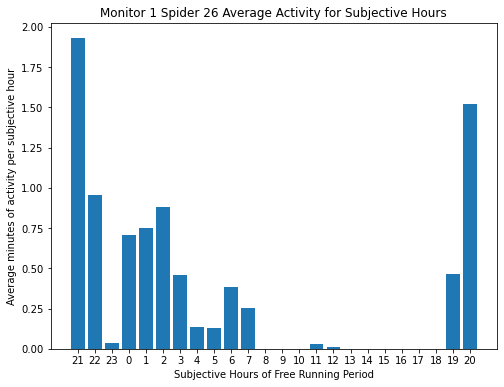

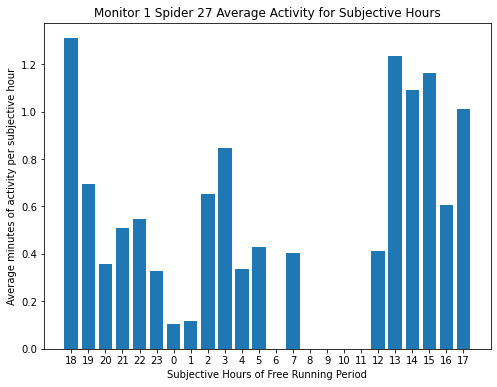

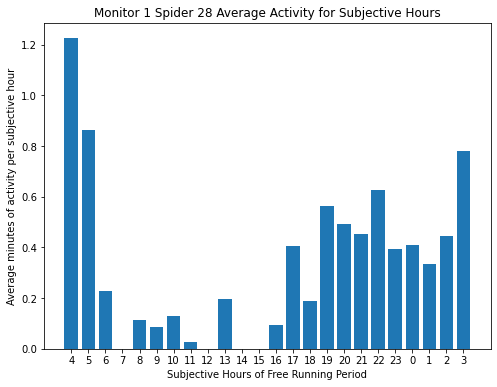

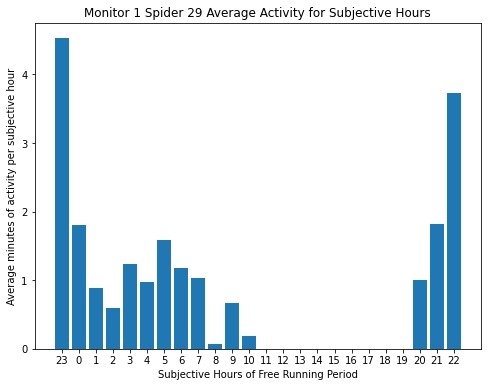

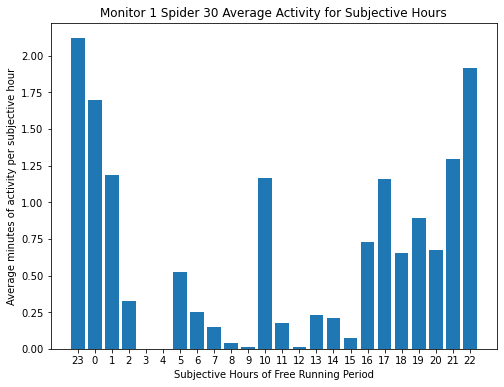

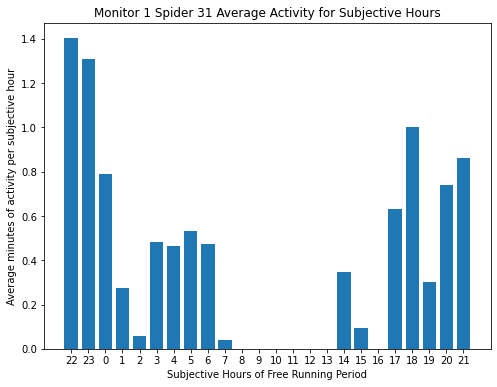

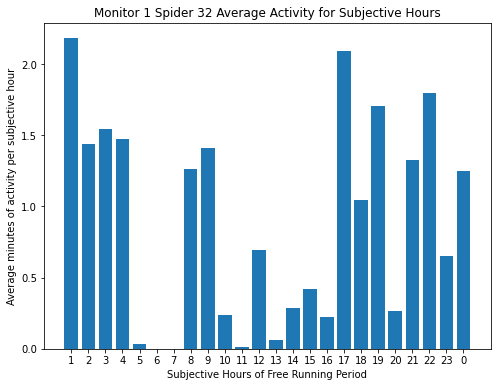

In [27]:
average_subjective_activity_max_first(dft, perT)